# TinWidgets Tests
`__version__ : '0.1.0'`

## Features
<input type="checkbox"/> Outputwidget support</br>
<input type="checkbox"/> Slider interactivity 

## Dev 
Widget system: each artist can have properties that are synched with widgets values. This link is both sides. Additionally each Artist has a default behaviour with the output widget that does not need to be specifically implemented.
So we have two things:
- a general behaviour depending on artist's type with output widget, but the output widget is given
- an instace specific link between an artist property and a widget value

## TODO
<input type="checkbox"/> Support for multiple canvases

In [1]:
import test_utils
test_utils.prepare_env()
import tinwidgets as tinw
import importlib
import test_utils

importlib.reload(tinw)
if tinw.__version__ != '0.1.0':
    raise Exception('tinwidgets version is not 0.1.0, it is', tinw.__version__)
else:
    print('tinwidgets version is 0.1.0, proceeding...')
    
test_utils.prepare_env(reload_all=False)


tinwidgets version is 0.1.0, proceeding...


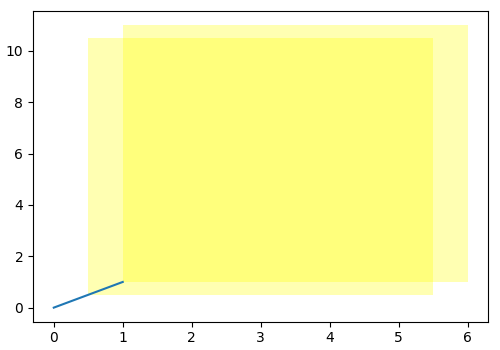

In [2]:
''' 
This is the basic test to check if the package is working correctly.
Nothing is changed from the last demo in 0.0.0_tests.ipynb, execpt 
dividing the code into modules.
'''
from test_utils import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

%matplotlib widget
importlib.reload(tinw)

import tinwidgets as tinw
# prepare_env()

with plt.ioff():
    fig, ax = plt.subplots()

x = np.linspace(0,5,30)
y = np.sin(x)
rect = Rectangle([0.5, 0.5], 5, 10, alpha=.3,
                color = 'yellow', lw = 0)
rect1 = Rectangle([1, 1], 5, 10, alpha=.3,
                color = 'yellow', lw = 0)
line = Line2D([0,1], [0,1])
rect.set_picker(5)
rect1.set_picker(5)
line.set_picker(5)

# adds the line to the axs objects
# when calling ax.draw() the line 
# is drawn
# NOTE: if line.animated is true then 
# ax.draw() will not draw the line,
# the updates are handled manually
ax.add_artist(rect)
ax.add_artist(rect1)
ax.add_line(line)
ax.relim()
ax.autoscale_view()
fig.tight_layout()
fig.set_size_inches(5,3.5)
fig.canvas.draw()

bg = fig.canvas.copy_from_bbox(ax.bbox)
fig.canvas.blit(ax.bbox)

fig.canvas.mpl_connect('pick_event', tinw.on_pick)
fig.canvas.mpl_connect('motion_notify_event', tinw.on_move)
fig.canvas.mpl_connect('button_release_event', tinw.on_release)
fig.canvas.mpl_connect('figure_leave_event', tinw.on_release)
fig.canvas.mpl_connect('draw_event', tinw.on_draw)

fig.show()

In [77]:
'''
Implementing the interactions between the widgets 
and the matplotlib objects.
'''
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import test_utils
from test_utils import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

test_utils.prepare_env()

fig, ax = tinw.subplots()
x = np.linspace(0,5,30)
y = np.sin(x)
rect = Rectangle([0.5, 0.5], 5, 10, alpha=.3,
                color = 'yellow', lw = 0)
rect1 = Rectangle([1, 1], 2, 5, alpha=.3,
                color = 'yellow', lw = 0)
line = Line2D([0,1], [0,1])
rect.set_picker(5)
rect1.set_picker(5)
line.set_picker(5)

# adds the line to the axs objects
# when calling ax.draw() the line 
# is drawn
# NOTE: if line.animated is true then 
# ax.draw() will not draw the line,
# the updates are handled manually
ax.add_artist(rect)
ax.add_artist(rect1)
ax.add_line(line)
ax.relim()
ax.autoscale_view()
fig.tight_layout()
fig.set_size_inches(5,3.5)
fig.canvas.draw()

bg = fig.canvas.copy_from_bbox(ax.bbox)
fig.canvas.blit(ax.bbox)

# interactive 
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)


# ___ WIDGETS ___
out = widgets.Output()
out.append_stdout('stdout:\n')
out.append_stdout(fig.get_dpi())

x = widgets.FloatSlider(
    value=7,
    min=0,
    max=5,
    step=.1,
    description='Left:',
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)
y = widgets.FloatSlider(
    value=7,
    min=0,
    max=5,
    step=.1,
    description='Bottom:',
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)
width = widgets.FloatSlider(
    value=7,
    min=0,
    max=5,
    step=.1,
    description='Width:',
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)
height = widgets.FloatSlider(
    value=7,
    min=0,
    max=5,
    step=.1,
    description='Height:',
    orientation='horizontal',
    readout=True,
    readout_format='.1f'
)
wid_list = [x, y, width, height]

right_box = widgets.VBox(wid_list)
app = widgets.HBox([fig.canvas, right_box])
tinw.link_property(x, rect, 'x')
tinw.link_property(y, rect, 'y')
tinw.link_property(width, rect, 'width')
tinw.link_property(height, rect, 'height')

app

In [11]:
tinw.widget_handler.show_logs()

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

# Interfaces for widgets

In [ ]:
''' 
Rectangle interface mockup
'''

from ipywidgets import Layout, Button, Box, FloatSlider, Label, Dropdown

box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='center',
                    align_content='flex-start',
                    border='solid',
                    padding='0px',
                    margin='0px',
                    width='40%',
                    )

items_layout = Layout(
    width='100%',
    margin='0px',
) 

dropdown = Dropdown(
	options=['option1', 'option2', 'option3'],
	value='option1',
	description='Choose:',
	layout=Layout(width='90%')
)

fit_button = Button(description='Fit', layout=Layout(width='90%'))
title = Label('Rect MockUp', layout=Layout(width='90%'))
words = ['left', 'top', 'width', 'height']
items = [FloatSlider(description=word, layout=items_layout) for word in words]
items = [title, dropdown] + items
items.append(fit_button)
box = Box(children=items, layout=box_layout)
box

Box(children=(Label(value='Rect MockUp', layout=Layout(width='90%')), Dropdown(description='Choose:', layout=L…

In [54]:
''' 
Line interface mockup
'''

from ipywidgets import Layout, Button, Box, FloatSlider, Label, Dropdown

box_layout = Layout(display='flex',
                    flex_flow='column',
                    align_items='center',
                    align_content='flex-start',
                    border='solid',
                    padding='0px',
                    margin='0px',
                    width='40%',
                    )

items_layout = Layout(
    width='100%',
    margin='0px',
) 

reset_button = Button(description='Reset', layout=Layout(width='90%'))
title = Label('Line MockUp', layout=Layout(width='90%'))
words = ['x-offset', 'y-offset', 'x-scale', 'y-scale']
items = [FloatSlider(description=word, layout=items_layout) for word in words]
items = [title] + items
items.append(reset_button)
box = Box(children=items, layout=box_layout)
box

Box(children=(Label(value='Line MockUp', layout=Layout(width='90%')), FloatSlider(value=0.0, description='x-of…

In [ ]:
import test_utils
test_utils.prepare_env()
from components import *
from ipywidgets import Tab, HBox, HTML, Button, Box, AppLayout, GridspecLayout, Layout
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import tinwidgets as tinw
%matplotlib widget
 
fitPanel = FitPanelWidget()
wavePanel = WavePanel()

x = np.linspace(0,5,30)
y = np.sin(x)


fig, ax = tinw.subplots()

wave = Line2D(x, y)
ax.add_line(wave)
ax.relim()
ax.autoscale_view()
wave.set_picker(5)



tab = Tab(children=[fitPanel.container, wavePanel.container])
tab.set_title(0, 'Fitting Panel')
tab.set_title(1, 'Wave Panel')

tinw.link_transform(wavePanel.items[1], wave, 'tx')

layout = AppLayout(
	center=fig.canvas,
	right_sidebar=tab,
	pane_widths=[0, 2, 1]
)
display(layout)

CompositeGenericTransform(
    CompositeGenericTransform(
        CompositeGenericTransform(
            Affine2D(
                [[ 0.00201613  0.         -0.16129032]
                 [ 0.          0.00270563 -0.14285714]
                 [ 0.          0.          1.        ]]),
            Affine2D(
                [[ 5.5         0.         -0.25      ]
                 [ 0.          2.19799988 -1.09827266]
                 [ 0.          0.          1.        ]])),
        Affine2D().scale(1.0)),
    CompositeGenericTransform(
        TransformWrapper(
            BlendedAffine2D(
                IdentityTransform(),
                IdentityTransform())),
        CompositeGenericTransform(
            BboxTransformFrom(
                TransformedBbox(
                    Bbox(x0=-0.25, y0=-1.0982726642650087, x1=5.25, y1=1.0997272168229384),
                    TransformWrapper(
                        BlendedAffine2D(
                            IdentityTransform(),
             

TypeError: 'CompositeGenericTransform' object is not subscriptable

In [89]:
import matplotlib.transforms as transforms
from matplotlib.lines import Line2D
line = Line2D([0,1], [0,1])
line.set_transform(transforms.Affine2D().translate(0.7, 0.5).scale(2,3) + line.get_transform())
# line.set_transform(transforms.Affine2D().scale(2,3).translate(0.7, 0.5) + line.get_transform())
line.properties()
x = line.get_transform().get_matrix()[0,2]
matrix = line._transform
print(line.get_transform().get_matrix())
print(x)
x = x + 1
print(x)
matrix = matrix + transforms.Affine2D().translate(1, 0)
print(matrix)
print(line.get_transform().get_matrix())

[[2.  0.  1.4]
 [0.  3.  1.5]
 [0.  0.  1. ]]
1.4
2.4
CompositeAffine2D(
    Affine2D(
        [[2.  0.  1.4]
         [0.  3.  1.5]
         [0.  0.  1. ]]),
    Affine2D(
        [[1. 0. 1.]
         [0. 1. 0.]
         [0. 0. 1.]]))
[[2.  0.  1.4]
 [0.  3.  1.5]
 [0.  0.  1. ]]


In [51]:
import numpy as np
aff = transforms.Affine2D().translate(1,0).get_matrix()
mat = np.random.rand(3,3)
aff = np.diag([1,0,0])
print(mat, aff, sep='\n')
print((aff * mat).sum()) 
masks = {
        'sx' : (0,0),
        'sy' : (1,1),
        'tx' : (0,2),
        'ty' : (1,2),
    }

print(mat[masks['sx']])

[[0.28566504 0.76839233 0.48352928]
 [0.01911912 0.8128926  0.5646818 ]
 [0.25187131 0.51519768 0.29889542]]
[[1 0 0]
 [0 0 0]
 [0 0 0]]
0.28566504098790724
0.28566504098790724


Using matplotlib backend: widget
Initial Transform: IdentityTransform()


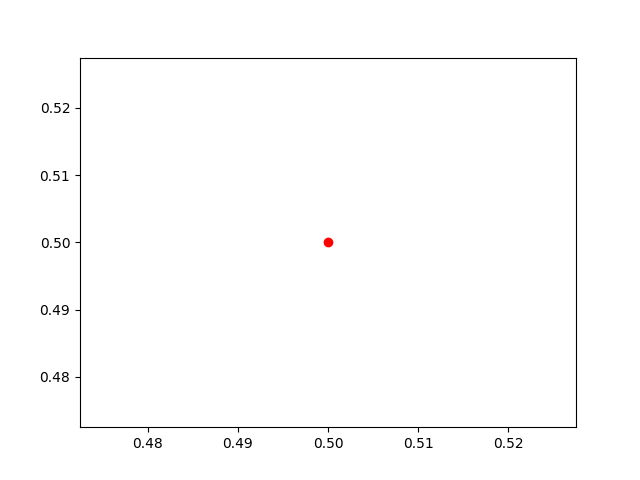

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib 

fig, ax = plt.subplots()

# Create a scatter point
point = ax.scatter([0.5], [0.5], color='red', picker=True)  # Enable picking

# Get and print the initial transformation
initial_transform = point.get_transform()
print("Initial Transform:", initial_transform)

# Define a pick event function
def on_pick(event):
    artist = event.artist
    print("Picked Artist:", artist)

    # Get and print the new transformation after picking
    new_transform = artist.get_transform()
    print("New Transform:", new_transform)

fig.canvas.mpl_connect("pick_event", on_pick)

plt.show()
